In [11]:
"""ATMS 523 Module 3 Submission -- Scott Andersen."""

'ATMS 523 Module 3 Submission -- Scott Andersen.'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# The three data files used here are from NOAA's
# Global Historical Climatology Network - Daily (GHCN-Daily), Version 3 
# DOI: https://doi.org/10.7289/V5D21VHZ
stn_link = 'http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-stations.txt'
stn_ids = pd.read_fwf(stn_link, header=None, infer_nrows=1000)
stn_ids.columns = ['ID', 'LAT', 'LON', 'ELEV', 'UKN', 'NAME', 'GSN', 'WBAN']
stn_ids

,ID,LAT,LON,ELEV,UKN,NAME,GSN,WBAN
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,41217.0
...,...,...,...,...,...,...,...,...
129653,ZI000067969,-21.0500,29.3670,861.0,NaN,WEST NICHOLSON,NaN,67969.0
129654,ZI000067975,-20.0670,30.8670,1095.0,NaN,MASVINGO,NaN,67975.0
129655,ZI000067977,-21.0170,31.5830,430.0,NaN,BUFFALO RANGE,NaN,67977.0
129656,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0


In [14]:
periods_link = 'http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-inventory.txt'
periods = pd.read_fwf(periods_link, header=None, infer_nrows=1000)
periods.columns = ['ID', 'LAT', 'LON', 'ELEM', 'TiMIN', 'TiMAX']
periods

,ID,LAT,LON,ELEM,TiMIN,TiMAX
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949
...,...,...,...,...,...,...
767053,ZI000067983,-20.2000,32.6160,PRCP,1951,2025
767054,ZI000067983,-20.2000,32.6160,TAVG,1962,2025
767055,ZI000067991,-22.2170,30.0000,TMAX,1951,1990
767056,ZI000067991,-22.2170,30.0000,TMIN,1951,1990


In [15]:
merged_stns = pd.merge(stn_ids, periods, how='left',
                       left_on='ID', right_on='ID')
merged_stns = merged_stns[(merged_stns['ELEM'] == 'TMAX') &
                          (merged_stns['TiMAX'] == 2025)]
merged_stns[merged_stns["NAME"].str.contains("GRAND RAPIDS")]

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
525221,USC00202375,42.9378,-85.6131,227.4,MI,E GRAND RAPIDS,NaN,NaN,42.9378,-85.6131,TMAX,2015.0,2025.0
528418,USC00206013,42.8933,-85.5447,236.2,MI,NWSFO GRAND RAPIDS,NaN,NaN,42.8933,-85.5447,TMAX,2016.0,2025.0
532752,USC00213299,47.2167,-93.5167,396.8,MN,GRAND RAPIDS,NaN,NaN,47.2167,-93.5167,TMAX,2024.0,2025.0
532755,USC00213303,47.2436,-93.4975,399.3,MN,GRAND RAPIDS FORESTRY LAB,NaN,NaN,47.2436,-93.4975,TMAX,1915.0,2025.0
763684,USW00094860,42.8939,-85.5450,266.7,MI,GRAND RAPIDS,NaN,72635.0,42.8939,-85.5450,TMAX,1963.0,2025.0


In [16]:
# Grand Rapids Forestry Lab station code
STATION = "USW00094860"
station_link = \
    f"http://noaa-ghcn-pds.s3.amazonaws.com/csv/by_station/{STATION}.csv"
station_data = pd.read_csv(station_link)
station_data

/tmp/ipykernel_13980/2807856927.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  station_data = pd.read_csv(station_link)


,ID,DATE,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME
0,USW00094860,19631124,TMAX,50,NaN,NaN,0,2400.0
1,USW00094860,19631125,TMAX,67,NaN,NaN,0,2400.0
2,USW00094860,19631126,TMAX,94,NaN,NaN,0,2400.0
3,USW00094860,19631127,TMAX,83,NaN,NaN,0,2400.0
4,USW00094860,19631128,TMAX,133,NaN,NaN,0,2400.0
...,...,...,...,...,...,...,...,...
383163,USW00094860,20250201,WSF5,112,NaN,NaN,W,NaN
383164,USW00094860,20250202,WSF5,121,NaN,NaN,W,NaN
383165,USW00094860,20250203,WSF5,130,NaN,NaN,W,NaN
383166,USW00094860,20250204,WSF5,112,NaN,NaN,W,NaN


In [17]:
def aggregate_station_data(station_data):
    """Aggregate the station data over a 30 year period."""
    # Convert dates to datetime
    sd = station_data
    sd["DATE"] = pd.to_datetime(station_data['DATE'], format='%Y%m%d')

    # Filter the data by date and remove leap years
    sdc = station_data[
        (sd["DATE"] >= pd.to_datetime("1991-01-01")) &
        (sd["DATE"] <= pd.to_datetime("2021-12-31"))
    ]
    sdc2 = sdc.drop(index=sdc[sdc.DATE.dt.dayofyear ==
                    pd.to_datetime("20240229",
                                   format='%Y%m%d').dayofyear].index)

    # Calculate the calendar day
    sdc2 = sdc2.assign(DATE=sdc['DATE'].dt.strftime('%m/%d'))

    # Group by the element and day then calculate the min, max, and mean
    sdg_tmax = sdc2.where(sdc2.ELEMENT == "TMAX").groupby(["DATE"]).agg(
        max_value=('DATA_VALUE', 'max'),
        min_value=('DATA_VALUE', 'min'),
        mean_value=('DATA_VALUE', 'mean')
    )

    sdg_tmin = sdc2.where(sdc2.ELEMENT == "TMIN").groupby(["DATE"]).agg(
        max_value=('DATA_VALUE', 'max'),
        min_value=('DATA_VALUE', 'min'),
        mean_value=('DATA_VALUE', 'mean')
    )

    # ['record_min_temp', average_min_temp', 'average_max_temp',
    # record_max_temp']
    return pd.DataFrame({
        "record_min_temp": sdg_tmin.min_value/10,
        "average_min_temp": sdg_tmin.mean_value/10,
        "record_max_temp": sdg_tmax.max_value/10,
        "average_max_temp": sdg_tmax.mean_value/10
    })

In [18]:
sdg = aggregate_station_data(station_data)
sdg

,record_min_temp,average_min_temp,record_max_temp,average_max_temp
DATE,,,,
01/01,-17.2,-7.112903,12.8,0.341935
01/02,-18.9,-6.532258,15.0,0.703226
01/03,-22.7,-5.970968,15.0,0.448387
01/04,-19.3,-5.916129,15.6,0.622581
01/05,-22.7,-6.567742,11.7,-0.712903
...,...,...,...,...
12/27,-24.3,-6.541935,15.6,1.574194
12/28,-23.2,-5.361290,12.8,1.616129
12/29,-14.4,-4.383871,12.2,1.712903


In [19]:
def get_year_data(year):
    """Get the highs and lows for each day in a specified year."""
    # uses global station_data value
    sd = station_data
    sd["DATE"] = pd.to_datetime(station_data['DATE'], format='%Y%m%d')

    # Filter the data by date and remove leap years
    sdc = station_data[
        (sd["DATE"] >= pd.to_datetime(f"{year}-01-01")) &
        (sd["DATE"] <= pd.to_datetime(f"{year}-12-31"))
    ]
    sdc2 = sdc.drop(index=sdc[sdc.DATE.dt.dayofyear ==
                    pd.to_datetime("20240229",
                                   format='%Y%m%d').dayofyear].index)

    # Calculate the calendar day
    sdc2 = sdc2.assign(DATE=sdc['DATE'].dt.strftime('%m/%d'))

    # Group by the element and day then calculate the min, max, and mean
    sdg_tmax = sdc2.where(sdc2.ELEMENT == "TMAX").groupby(["DATE"]).agg(
        max_value=('DATA_VALUE', 'max'),
        min_value=('DATA_VALUE', 'min'),
        mean_value=('DATA_VALUE', 'mean')
    )

    sdg_tmin = sdc2.where(sdc2.ELEMENT == "TMIN").groupby(["DATE"]).agg(
        max_value=('DATA_VALUE', 'max'),
        min_value=('DATA_VALUE', 'min'),
        mean_value=('DATA_VALUE', 'mean')
    )

    # ['record_min_temp', average_min_temp', 'average_max_temp',
    # 'record_max_temp']
    return pd.DataFrame({
        "actual_min_temp": sdg_tmin.mean_value/10,
        "actual_max_temp": sdg_tmax.mean_value/10
    })

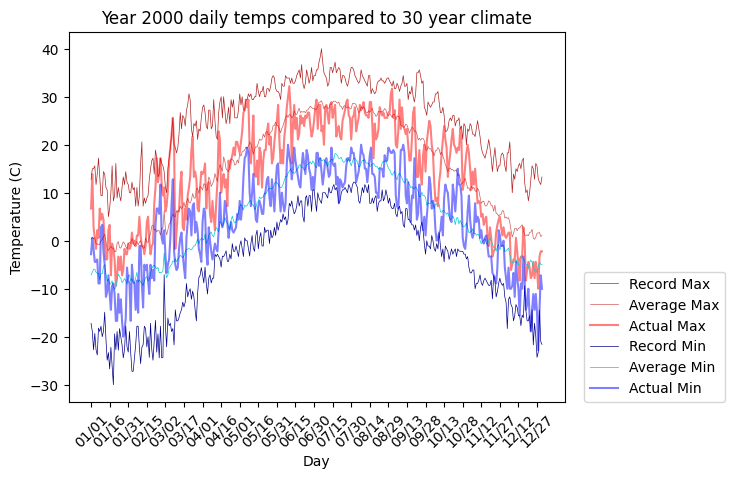

In [20]:
year_data = get_year_data(2000)

fig, ax = plt.subplots()
plt.plot(sdg.record_max_temp, color="firebrick",
         linewidth=0.5, label="Record Max")
plt.plot(sdg.average_max_temp, color="indianred",
         linewidth=0.5, label="Average Max")
plt.plot(year_data.actual_max_temp, color="red",
         alpha=0.5, label="Actual Max")

plt.plot(sdg.record_min_temp, color="darkblue",
         linewidth=0.5, label="Record Min")
plt.plot(sdg.average_min_temp, color="darkturquoise",
         linewidth=0.5, label="Average Min")
plt.plot(year_data.actual_min_temp, color="blue",
         alpha=0.5, label="Actual Min")

ax.set_title("Year 2000 daily temps compared to 30 year climate")
ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Day")
ax.set_xticks(list(year_data.index)[::15],
              list(year_data.index)[::15], rotation=45)
plt.legend(loc=(1.04, 0))
plt.show()